In [7]:
import pandas as pd
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import json
import string

In [8]:
fm.fontManager.addfont('../references/cmunorm.ttf')
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)
matplotlib.rcParams['font.family'] = 'CMU Concrete'

In [2]:
df = pd.read_csv('../data/processed_data.tsv', sep='\t', encoding='utf8')
df.doc_date = pd.to_datetime(df.doc_date)
df.origin_date = pd.to_datetime(df.origin_date)
#df.delta = pd.to_timedelta(df.delta, unit='days')
df = df[df.delta.isin(range(0,120))]

In [9]:
rz = pd.read_parquet('../data/RZ_processed.parquet')

In [10]:
rz

date  year  month  day               pub  \
0       1802-01-01  1802      1    1  Rigasche Zeitung   
1       1802-01-01  1802      1    1  Rigasche Zeitung   
2       1802-01-01  1802      1    1  Rigasche Zeitung   
3       1802-01-01  1802      1    1  Rigasche Zeitung   
4       1802-01-01  1802      1    1  Rigasche Zeitung   
...            ...   ...    ...  ...               ...   
289700  1888-12-31  1888     12   31  Rigasche Zeitung   
289701  1888-12-31  1888     12   31  Rigasche Zeitung   
289702  1888-12-31  1888     12   31  Rigasche Zeitung   
289703  1888-12-31  1888     12   31  Rigasche Zeitung   
289704  1888-12-31  1888     12   31  Rigasche Zeitung   

                                                  heading  \
0                         St. Petersburg, den 20. Decemb.   
1                              Paris, den 18ten December.   
2                              Haag, den 22sten December.   
3                             Zürich, den 16ten December.   
4                               Wien, den 19ten December.   
...                                                   ...   
289700                Eröffnungscours der Berliner Börse.   
289701                   Witterungsbeobachtungen in Riga.   
289702                             Witterungs-Telegramme,   
289703                               Neueste Nachrichten.   
289704  PeterSbnrs. 31. December. (Specialtele. Gramm ...   

                                                full_text  \
0       St. Petersburg, den 20. Decemb.\n\n\tAuf Aller...   
1       Paris, den 18ten December.\n\n\tDer Oberconsu!...   
2       Haag, den 22sten December.\n\n\tIn kurzem erwa...   
3       Zürich, den 16ten December.\n\n\tDie durch die...   
4       Wien, den 19ten December.\n\n\tDie Malcheser-N...   
...                                                   ...   
289700  Eröffnungscours der Berliner Börse.\n\n\tBern«...   
289701  Witterungsbeobachtungen in Riga.\n\n\tж &gt;« ...   
289702  Witterungs-Telegramme,\n\n\t»ttgetheiU der met...   
289703  Neueste Nachrichten.\n\n\tBerlin. 10. Januar (...   
289704  PeterSbnrs. 31. December. (Specialtele. Gramm ...   

                                                     href  text_len  \
0       https://proc.dom.lndb.lv/file.axd?id=3377815&a...      2067   
1       https://proc.dom.lndb.lv/file.axd?id=3377818&a...      3664   
2       https://proc.dom.lndb.lv/file.axd?id=3377819&a...       967   
3       https://proc.dom.lndb.lv/file.axd?id=3377822&a...       482   
4       https://proc.dom.lndb.lv/file.axd?id=3377823&a...      1154   
...                                                   ...       ...   
289700  https://proc.dom.lndb.lv/file.axd?id=15179939&...       200   
289701  https://proc.dom.lndb.lv/file.axd?id=15179940&...       537   
289702  https://proc.dom.lndb.lv/file.axd?id=15179941&...       794   
289703  https://proc.dom.lndb.lv/file.axd?id=15179942&...      2480   
289704  https://proc.dom.lndb.lv/file.axd?id=15179943&...      3078   

             placename origin_date origin_month  \
0       St. Petersburg          20          Dec   
1                Paris          18          Dec   
2                 Haag          22          Dec   
3               Zürich          16          Dec   
4                 Wien          19          Dec   
...                ...         ...          ...   
289700            None        None         None   
289701            None        None         None   
289702            None        None         None   
289703            None        None         None   
289704           Sbnrs          31          Dec   

                                  heading2  
0                           St. Petersburg  
1                                    Paris  
2                                     Haag  
3                                   Zürich  
4                                     Wien  
...                                    ...  
289700  Eröffnungscours der Berliner Börse  
289701     Witterungsbeob

In [4]:
df

doc_id   doc_date       placename  day  day2  month  month2  \
0            0 1802-01-01  St. Petersburg   20   NaN     12     NaN   
1            1 1802-01-01           Paris   18   NaN     12     NaN   
2            2 1802-01-01            Haag   22   NaN     12     NaN   
3            3 1802-01-01          Zürich   16   NaN     12     NaN   
4            4 1802-01-01            Wien   19   NaN     12     NaN   
...        ...        ...             ...  ...   ...    ...     ...   
226079  289703 1888-12-31      Kopenhagen    6  24.0      1    12.0   
226080  289703 1888-12-31          London   10  29.0      1    12.0   
226081  289703 1888-12-31         Belgrad   10  29.0      1    12.0   
226082  289703 1888-12-31        New York    9  28.0      1    12.0   
226083  289704 1888-12-31  St. Petersburg   31   NaN     12     NaN   

        origin_year  start   end origin_date  delta  
0               NaN      0    32  1801-12-20     12  
1               NaN      0    27  1801-12-06     26  
2               NaN      0    27  1801-12-10     22  
3               NaN      0    28  1801-12-04     28  
4               NaN      0    26  1801-12-07     25  
...             ...    ...   ...         ...    ...  
226079          NaN    817   855  1888-12-24      7  
226080          NaN   1517  1552  1888-12-29      2  
226081          NaN   1751  1787  1888-12-29      2  
226082          NaN   2009  2044  1888-12-28      3  
226083          NaN   1560  1586  1888-12-31      0  

[223981 rows x 12 columns]

In [147]:
def simple_segmentation(df, rz):
    
    for ix in tqdm(df.doc_id.unique()):
        
        article = df.loc[df.doc_id == ix]
        full_text = rz.loc[ix, 'full_text']
        
        msg_ids, placenames, starts, ends = list(article.index), list(article.placename), list(article.start), list(article.end)
        
        for msg_id, placename, end, start in zip(msg_ids, placenames, ends, starts[1:]+[len(full_text)]):
            
            yield {"msg_id": msg_id,
                   "doc_id": int(ix),
                   "placename": placename,
                   "text": full_text[end:start]}

In [148]:
spans = list(simple_segmentation(df, rz))

100%|█████████████████████████████████████████████████████████████████████████| 124799/124799 [05:30<00:00, 377.51it/s]


In [161]:
#with open('../data/spans.json', 'w', encoding='utf8') as f:
#    json.dump(spans, f)

In [4]:
with open('../data/spans.json', 'r', encoding='utf8') as f:
    spans = json.load(f)

In [5]:
with open('../temp/stopwords.json', 'r', encoding='utf8') as f:
    stopwords = json.load(f)

In [6]:
def is_garbage(token, treshold=0.3):
    """Test if a token "is garbage", i.e. if it contains too many weird symbols"""
    
    allowed_symbols = string.ascii_letters + 'äüöß'

    if len(token) == 0:
        return True
    
    non_alphabetical = 0
    for symbol in token:
        if symbol not in allowed_symbols:
            non_alphabetical += 1
            
    if non_alphabetical/len(token) >= treshold:
        return True
    else:
        return False


def tokenize(text, stopwords, min_len=4):
    """Parse the main dataframe into lists if lowercase tokens,
    leaving out stopwords, garbage tokens and words with len < 4 (default value)"""

    tokens = text.split()
    cleaned = []

    for token in tokens:
        wordform = token.lower().strip(string.punctuation).lstrip(string.punctuation)
        if not is_garbage(wordform) and len(wordform) >= min_len and wordform not in stopwords:
            cleaned.append(wordform)

    return cleaned

In [7]:
def tokenize_spans(spans):

    spans_tokenized = []
    
    for entry in tqdm(spans):
        spans_tokenized.append({
            "msg_id": entry["msg_id"],
            "doc_id": entry["doc_id"],
            "tokens": tokenize(entry["text"], stopwords)
        })
        
    return spans_tokenized

In [13]:
spans_tokenized = tokenize_spans(spans)

100%|█████████████████████████████████████████████████████████████████████████| 223981/223981 [13:00<00:00, 286.88it/s]


In [61]:
#with open('../data/spans_tokenized.json', 'w', encoding='utf8') as f:
#    json.dump(spans_tokenized, f)

In [ ]:
with open('../data/spans_tokenized.json', 'r', encoding='utf8') as f:
    spans_tokenized = json.load(f)

In [34]:
def build_top2vec_corpus(spans):
    """Prepare top2vec corpus"""
    corpus = {}
    for entry in spans:
        #for msg_id, doc_id, span in entry.items():
        corpus[str(entry['msg_id'])+'_'+str(entry['doc_id'])] = ' '.join(entry['tokens'])
    return corpus

In [54]:
corpus = build_top2vec_corpus(spans_tokenized)

In [1]:
from top2vec import Top2Vec

In [42]:
import multiprocessing

In [55]:
### try w/ min count 50 etc

t2v = Top2Vec(documents=list(corpus.values()),
              document_ids=list(corpus.keys()),
              min_count=20,
              speed='learn',
              workers=multiprocessing.cpu_count())

2022-11-06 16:58:23,430 - top2vec - INFO - Pre-processing documents for training
2022-11-06 17:02:03,575 - top2vec - INFO - Creating joint document/word embedding
2022-11-06 19:48:14,644 - top2vec - INFO - Creating lower dimension embedding of documents
2022-11-06 19:52:21,482 - top2vec - INFO - Finding dense areas of documents
2022-11-06 19:52:47,977 - top2vec - INFO - Finding topics


In [64]:
t2v.save('../data/models/t2v_061122.pkl')

In [57]:
t2v.get_num_topics()

423

In [67]:
t2v.hierarchical_topic_reduction(50)

[[285,
  226,
  358,
  336,
  388,
  162,
  279,
  208,
  411,
  418,
  234,
  308,
  414,
  239,
  372,
  393,
  386,
  333,
  338,
  259,
  363,
  51,
  352,
  355,
  191,
  169,
  395,
  413,
  150,
  410,
  391,
  406,
  397,
  383,
  320,
  357,
  248,
  252,
  340,
  404,
  399,
  302,
  238,
  374,
  179,
  303,
  329,
  387,
  396,
  122,
  316,
  392,
  240,
  417,
  347,
  421,
  420,
  307,
  419,
  341,
  348,
  296],
 [189, 71, 1],
 [33, 118, 206, 298, 343, 241, 174, 319, 330, 18],
 [137, 364, 47, 53, 6],
 [178, 69, 148, 55, 4],
 [228, 0],
 [22, 297, 2],
 [304, 367, 255, 201, 3],
 [346, 106, 180, 151, 172, 107, 256, 34],
 [403, 273, 187, 314, 398, 375, 405, 213, 72, 181, 116, 170, 236, 31],
 [243, 67, 197, 371, 11],
 [127, 65, 186, 249, 147, 102, 8],
 [10],
 [157,
  139,
  253,
  195,
  103,
  60,
  312,
  262,
  408,
  382,
  344,
  335,
  254,
  258,
  207,
  220,
  345,
  275,
  58],
 [134, 415, 155, 402, 400, 416, 79, 422, 7],
 [311, 43, 140, 48],
 [41, 52, 217, 268, 3

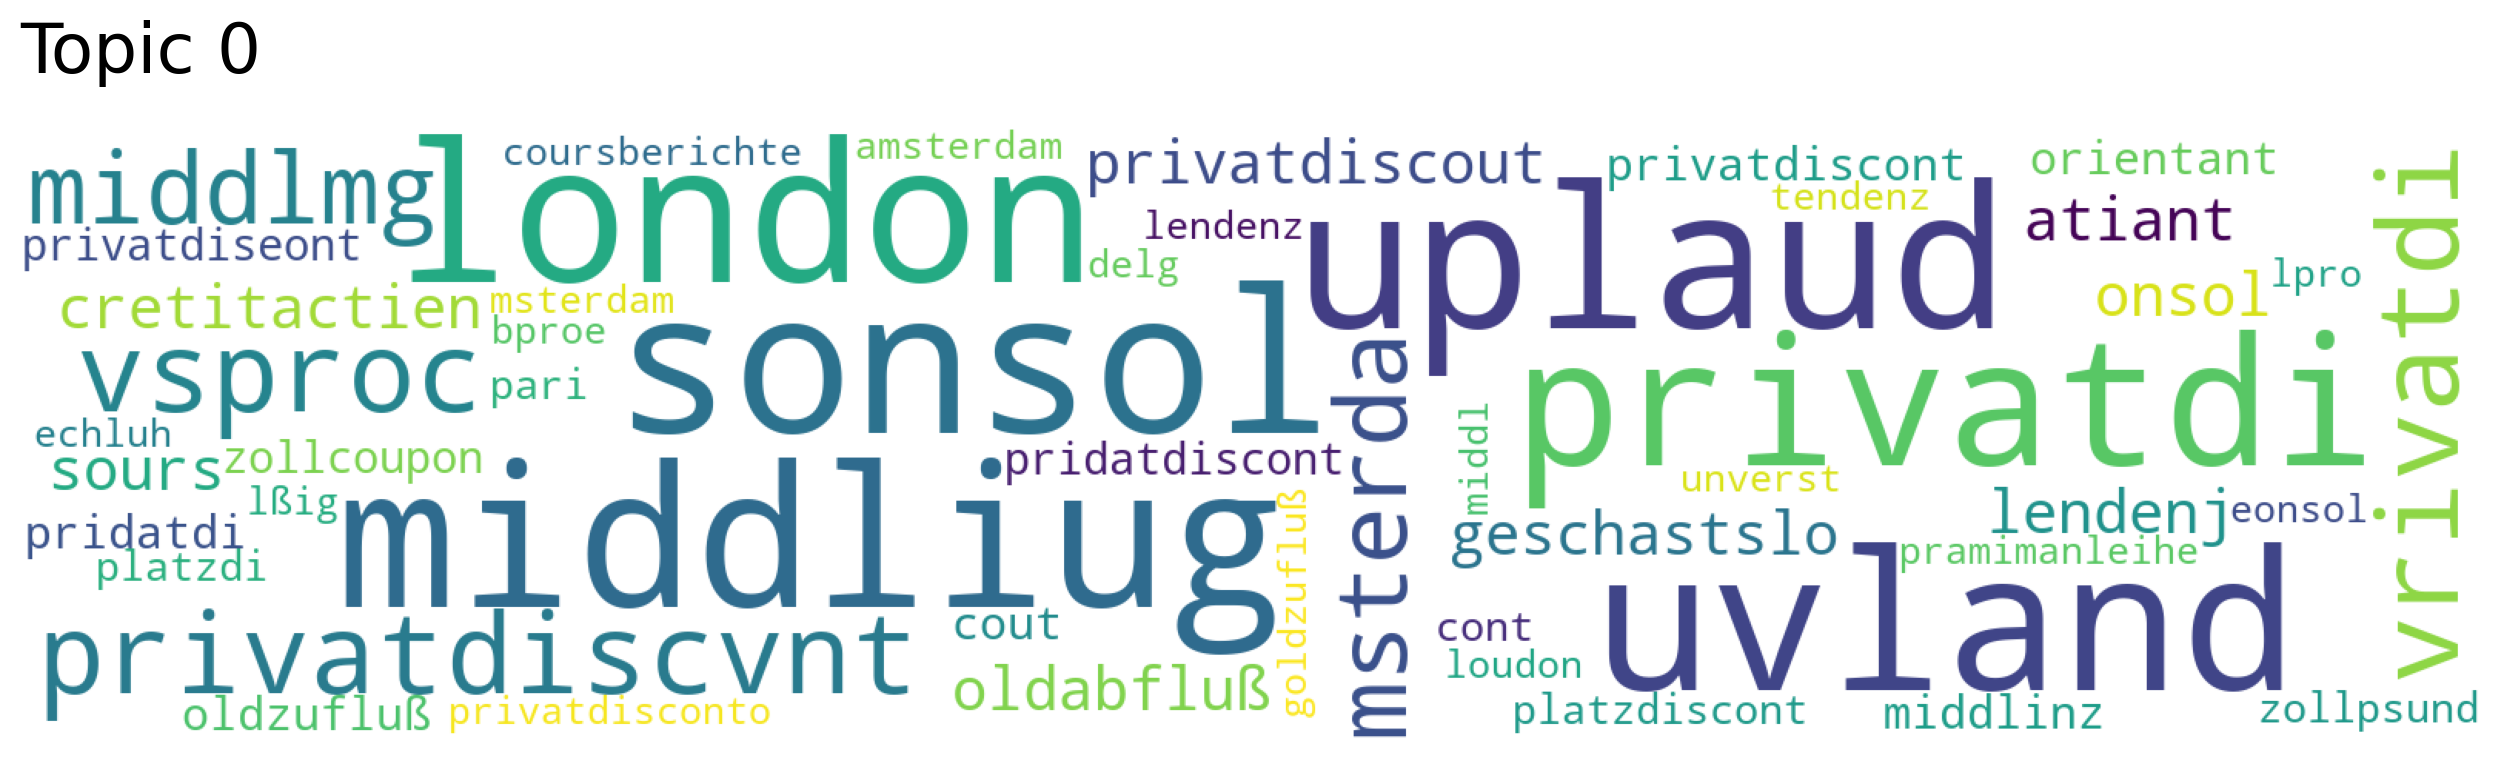

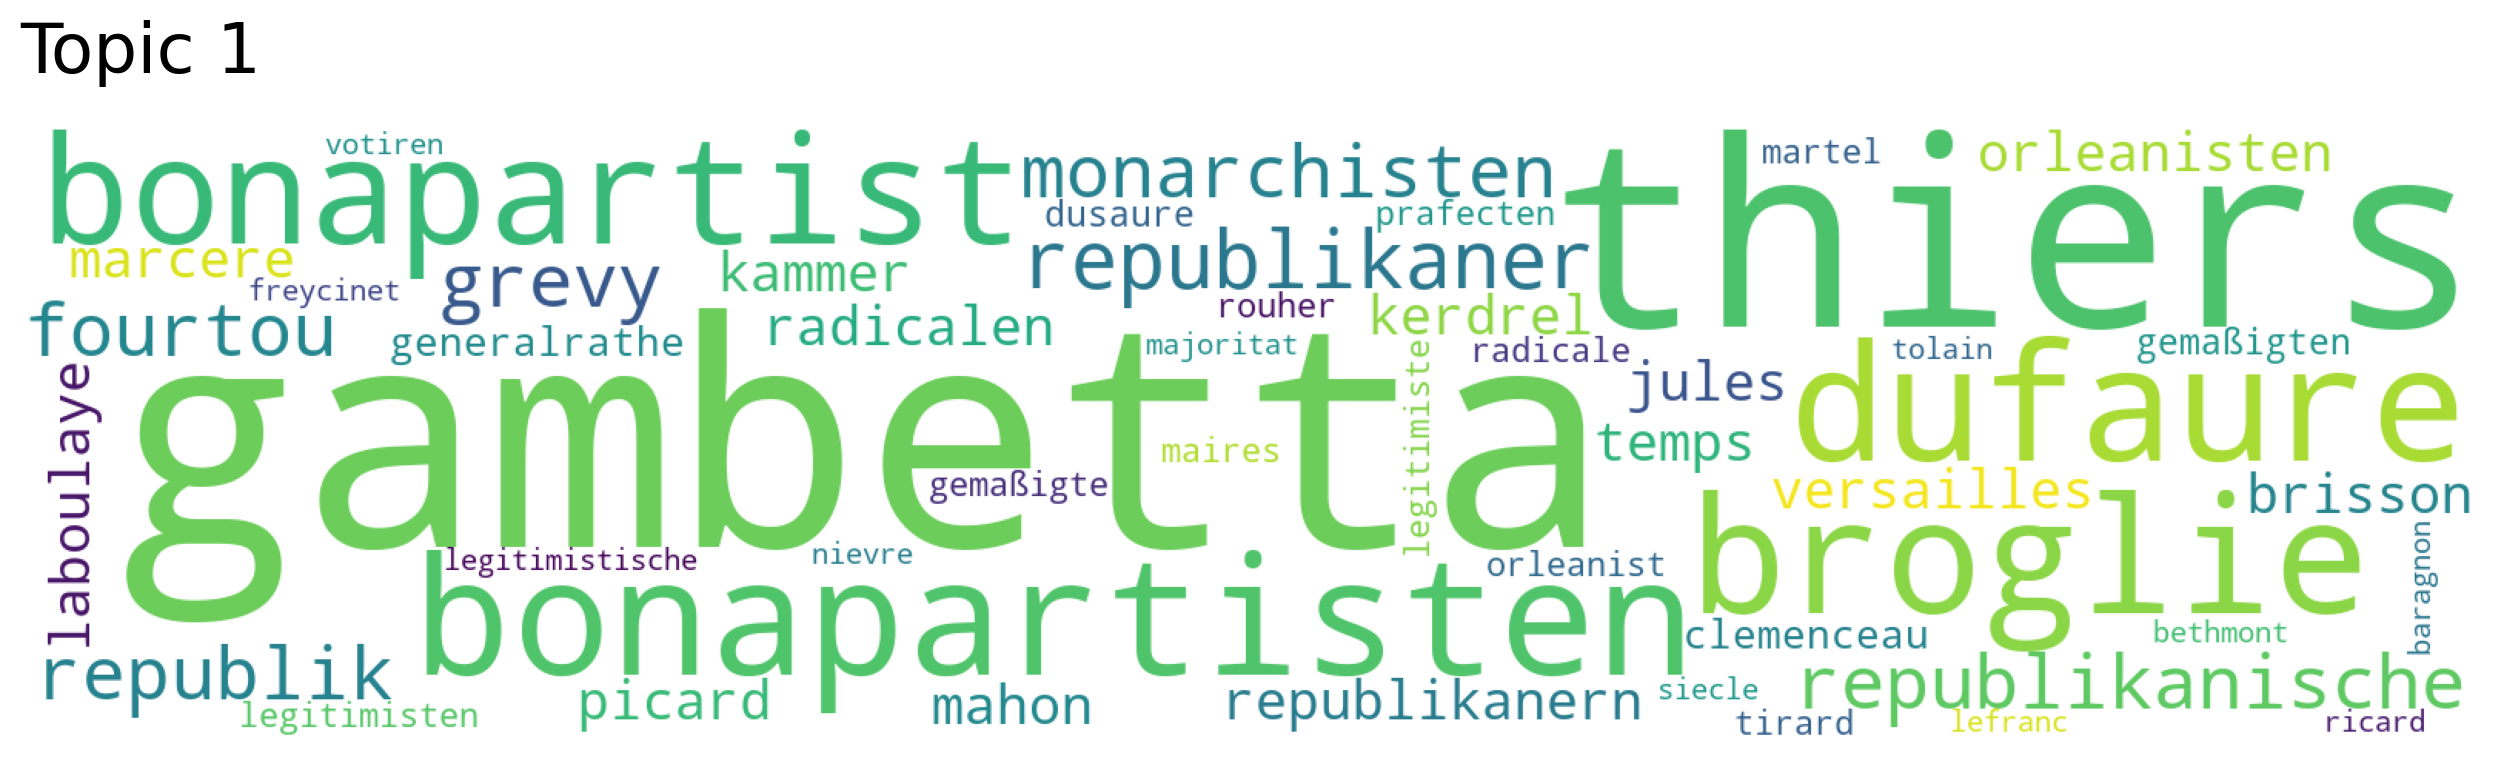

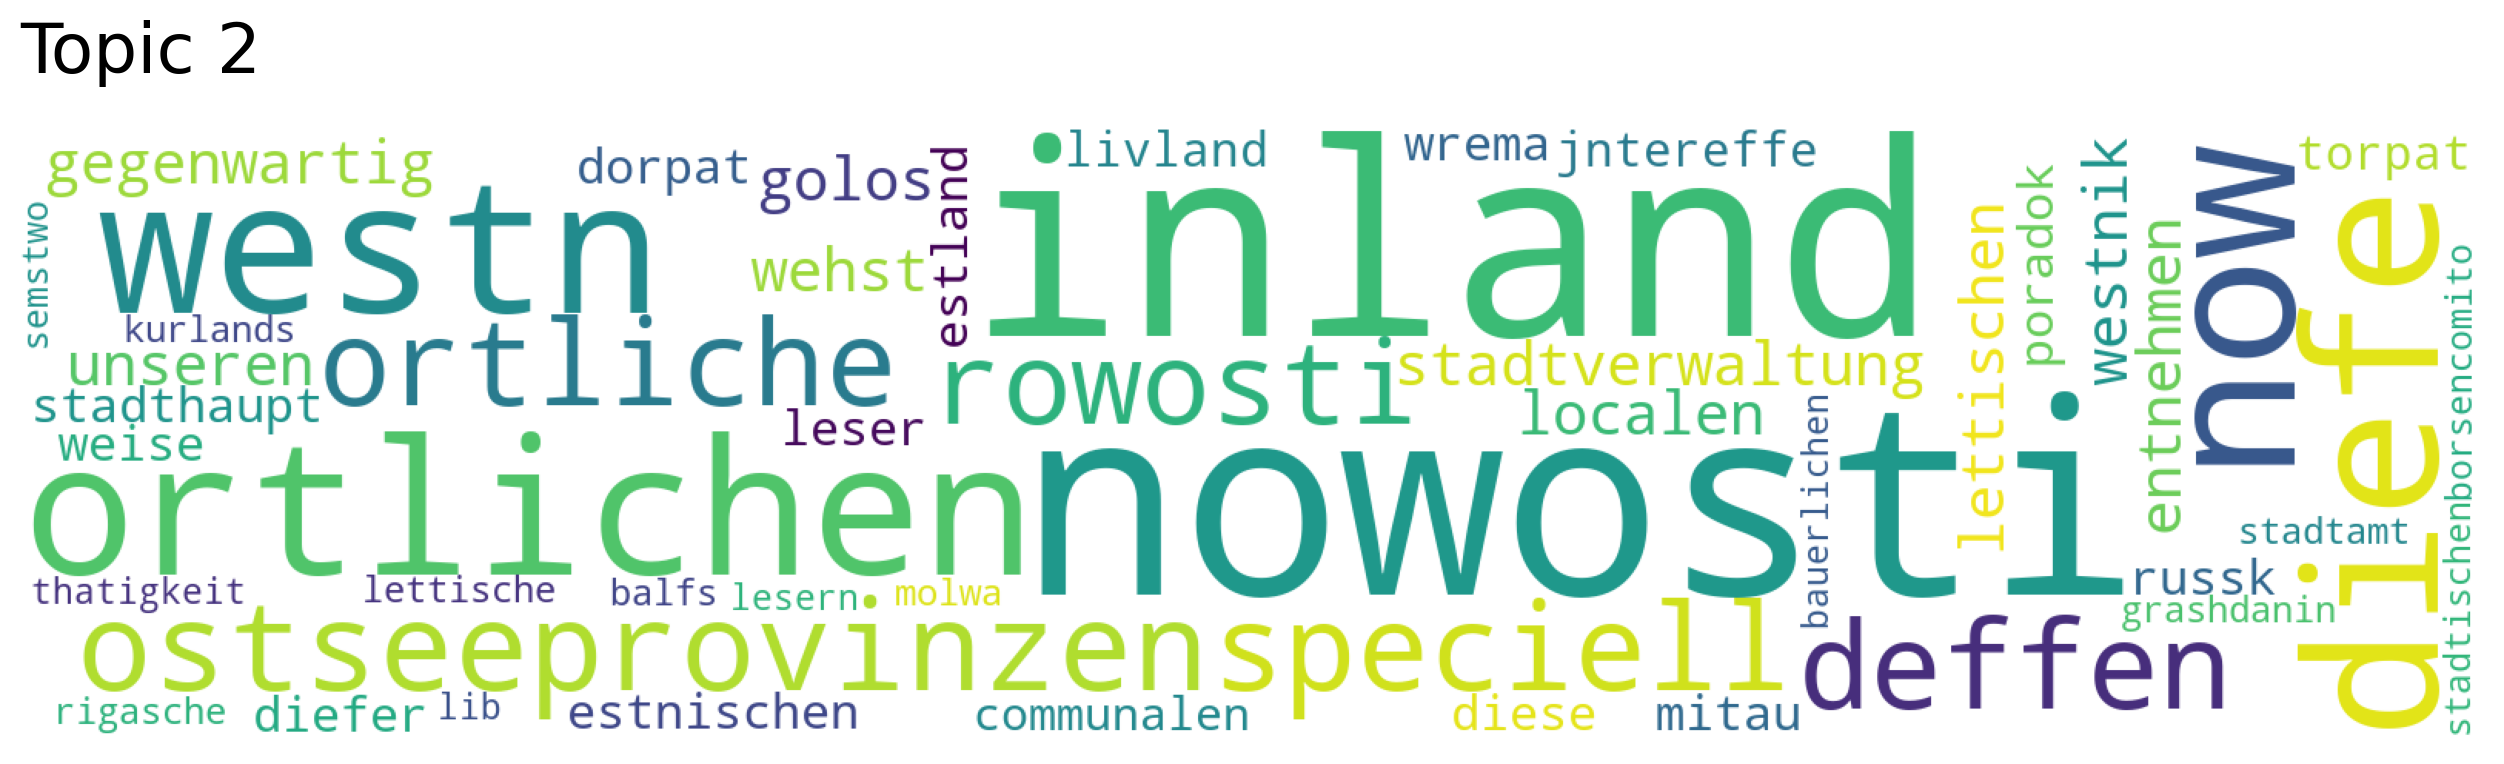

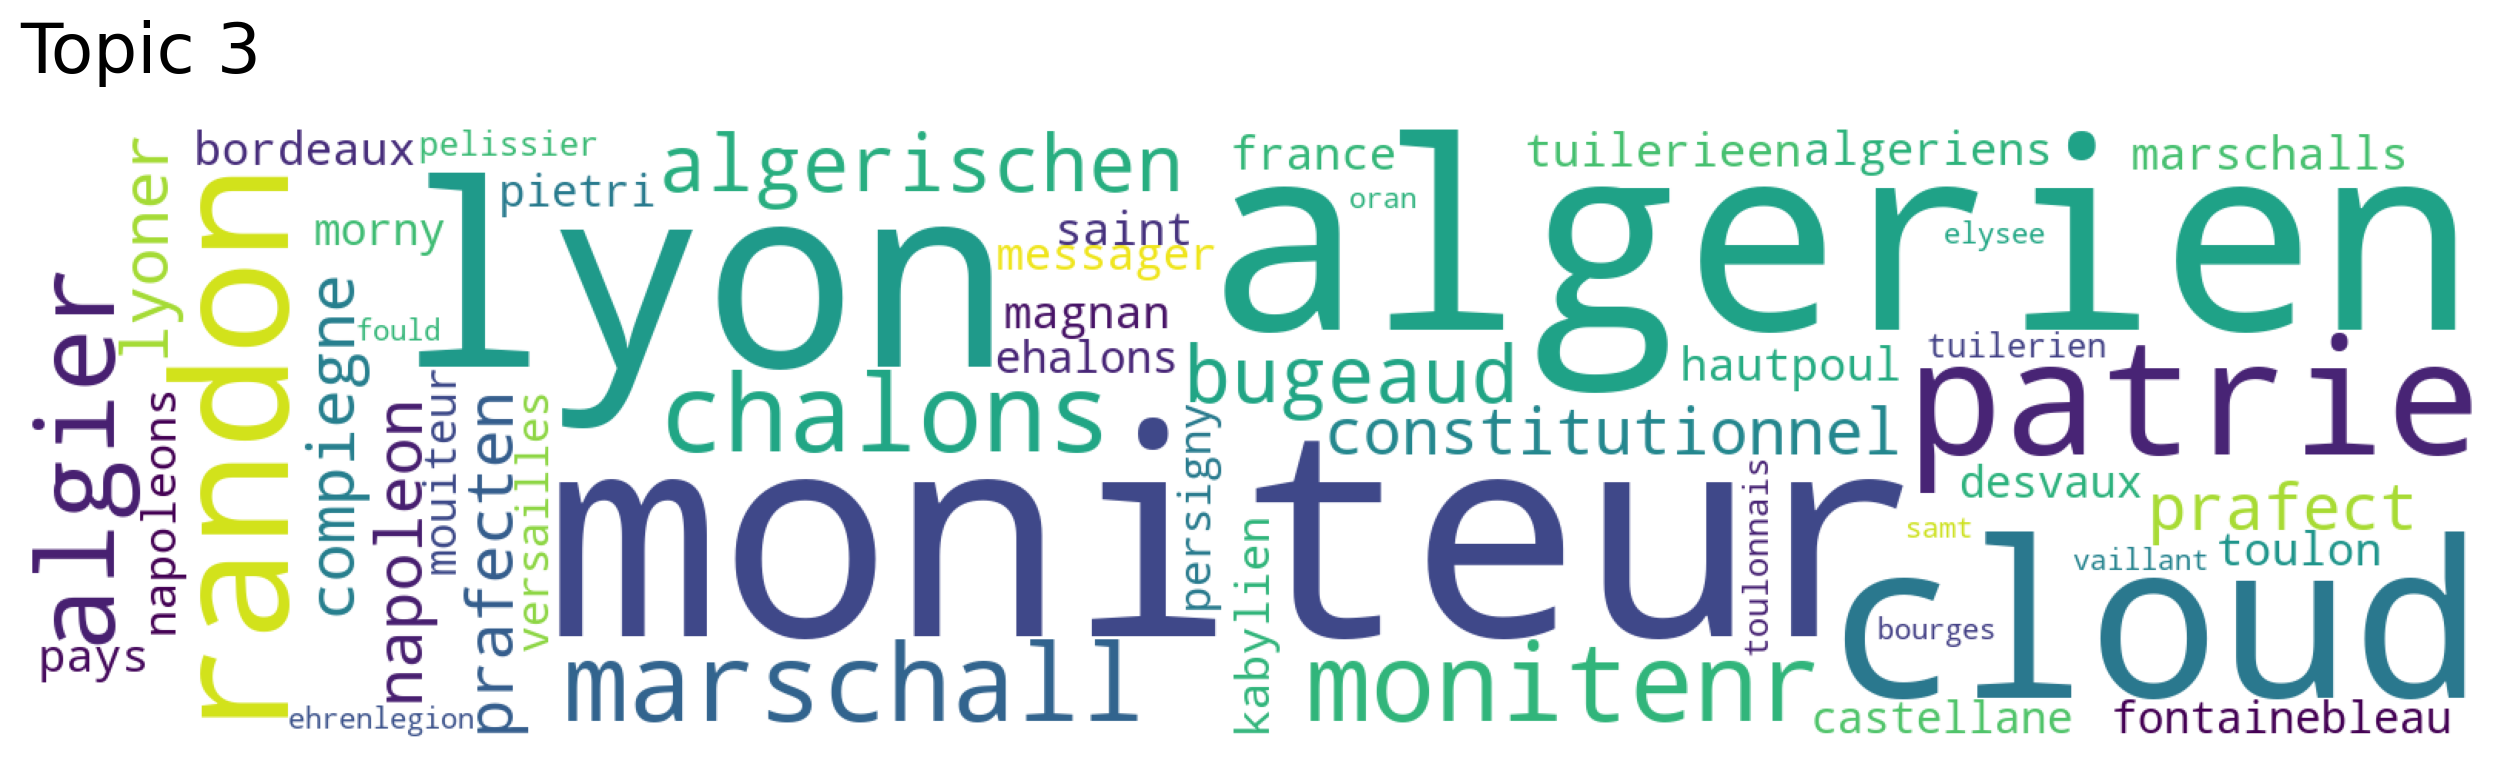

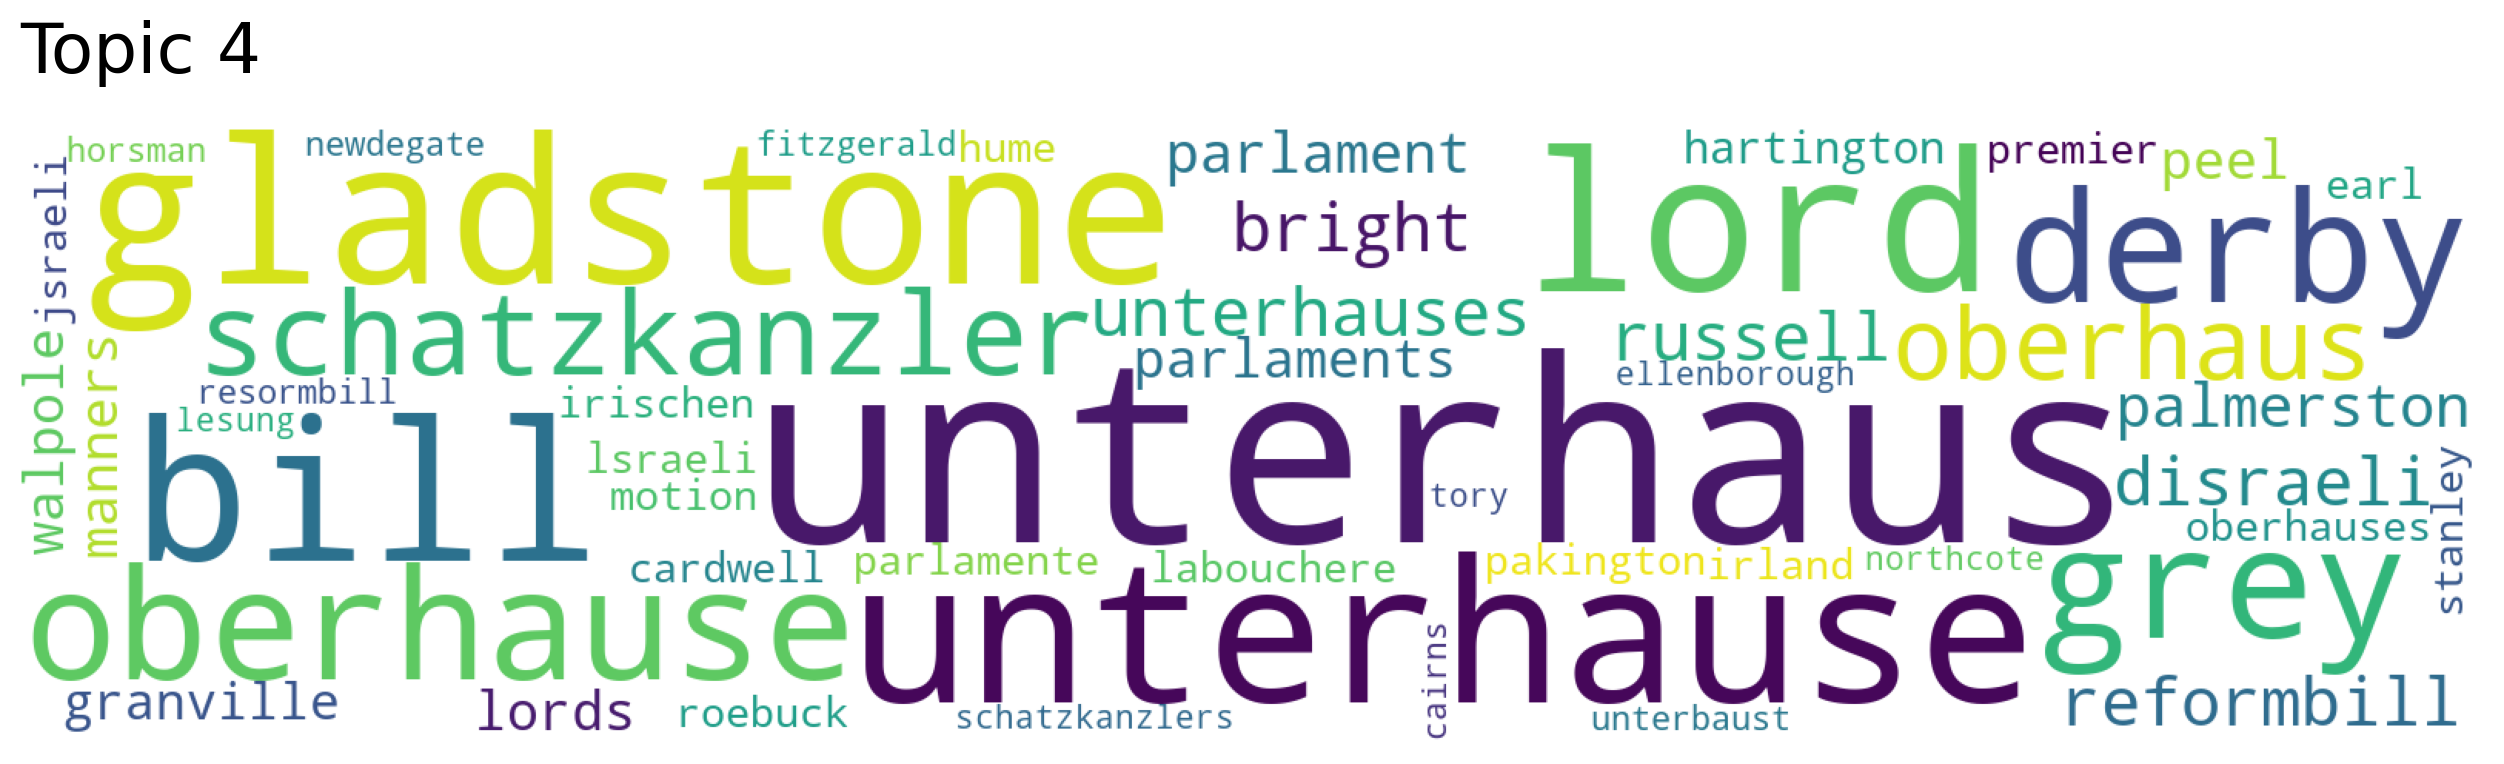

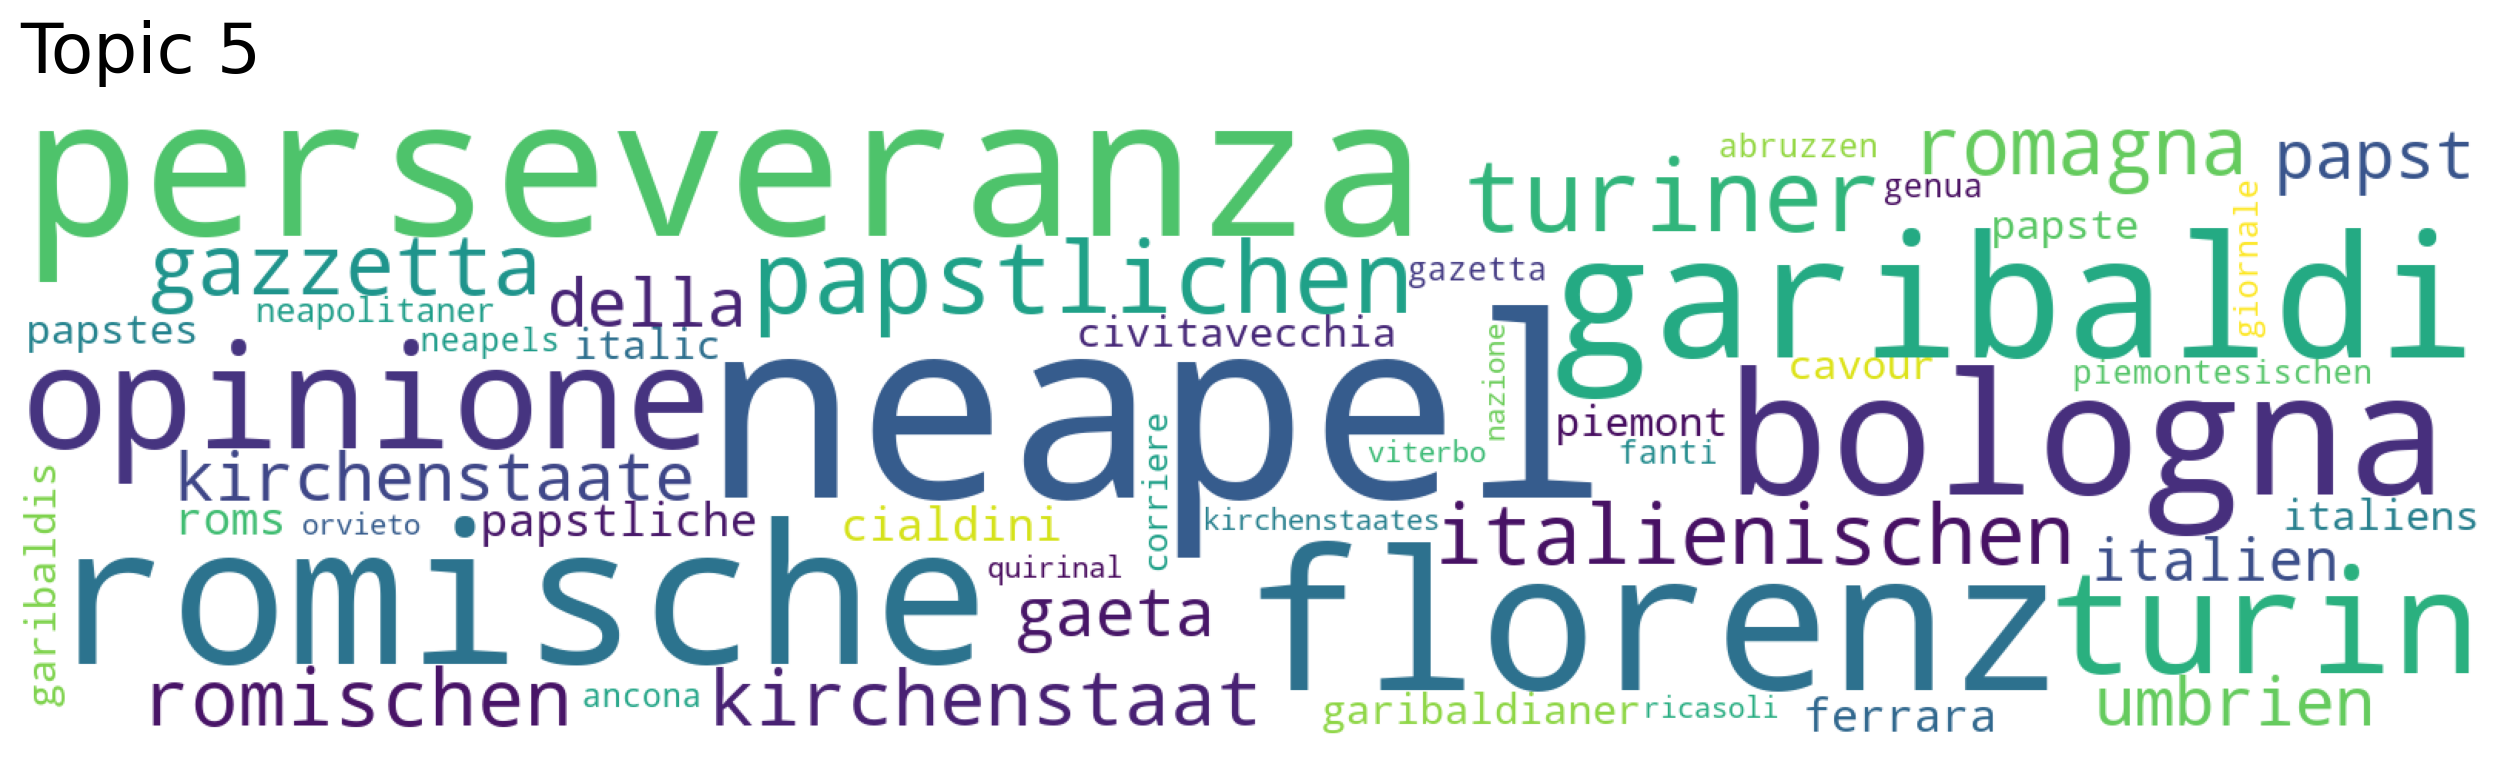

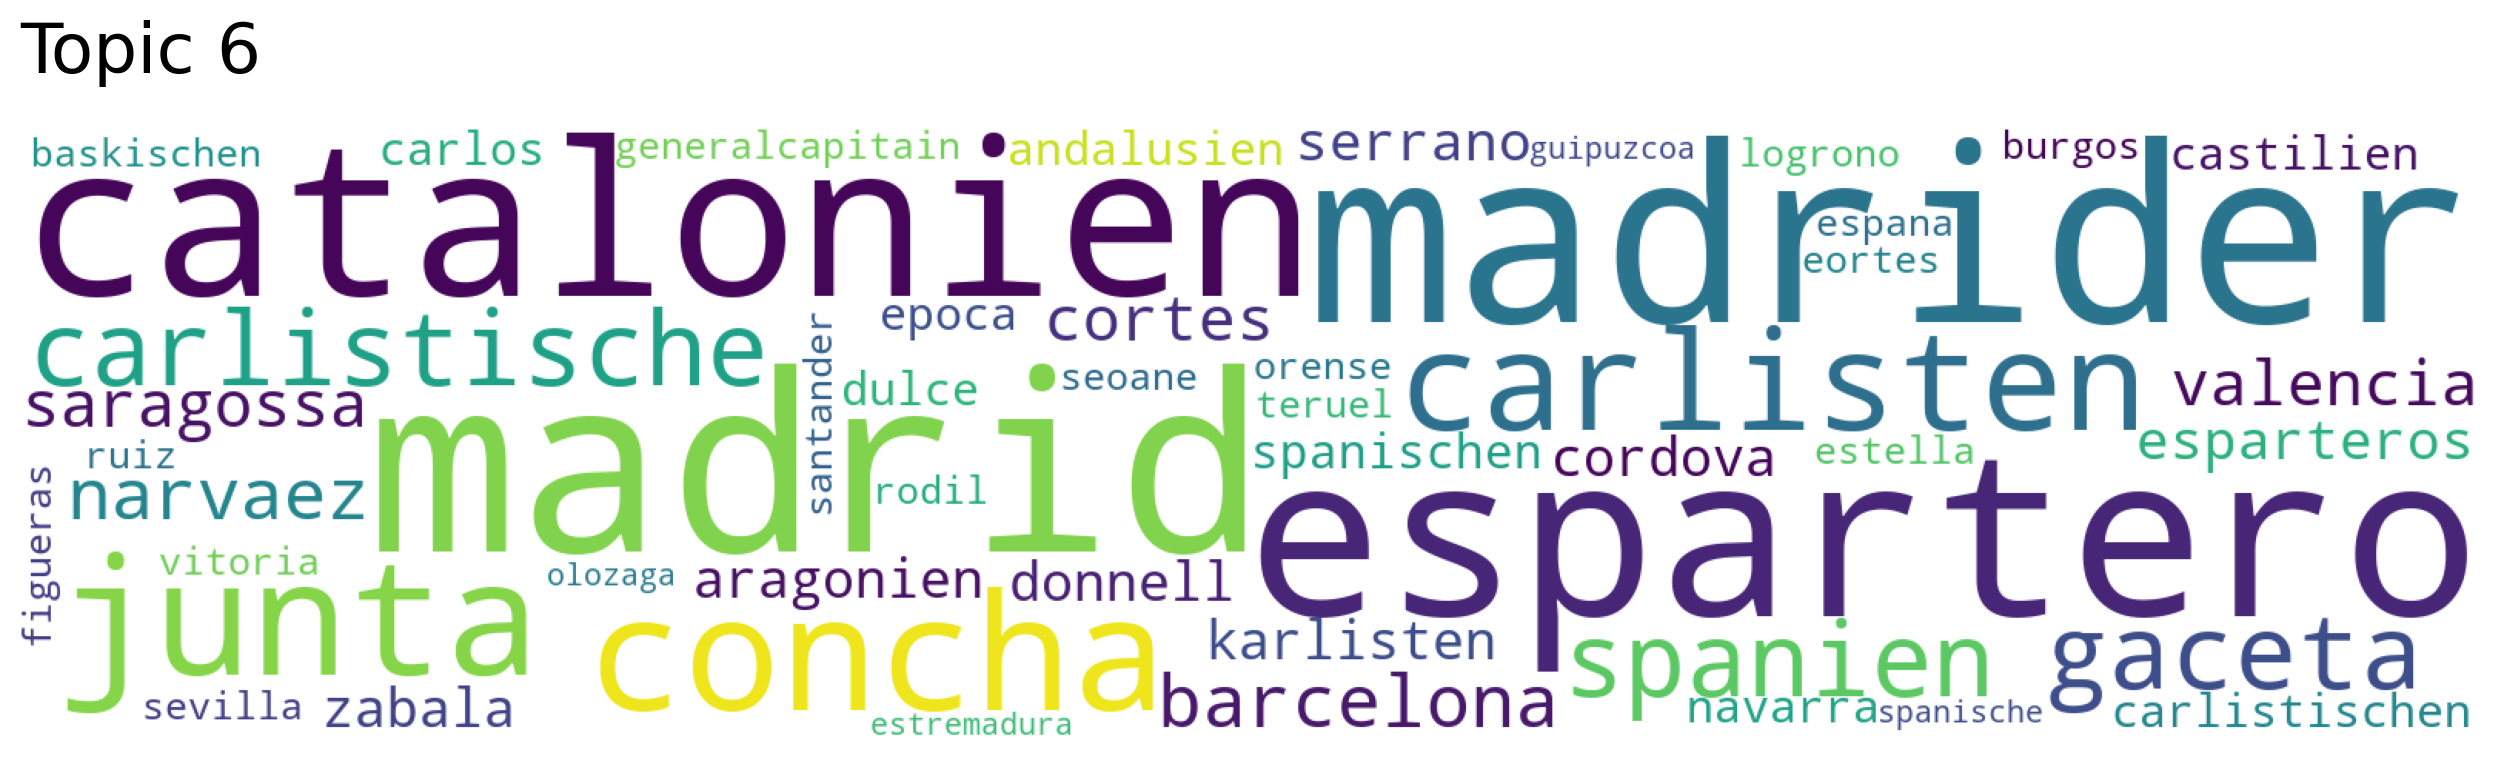

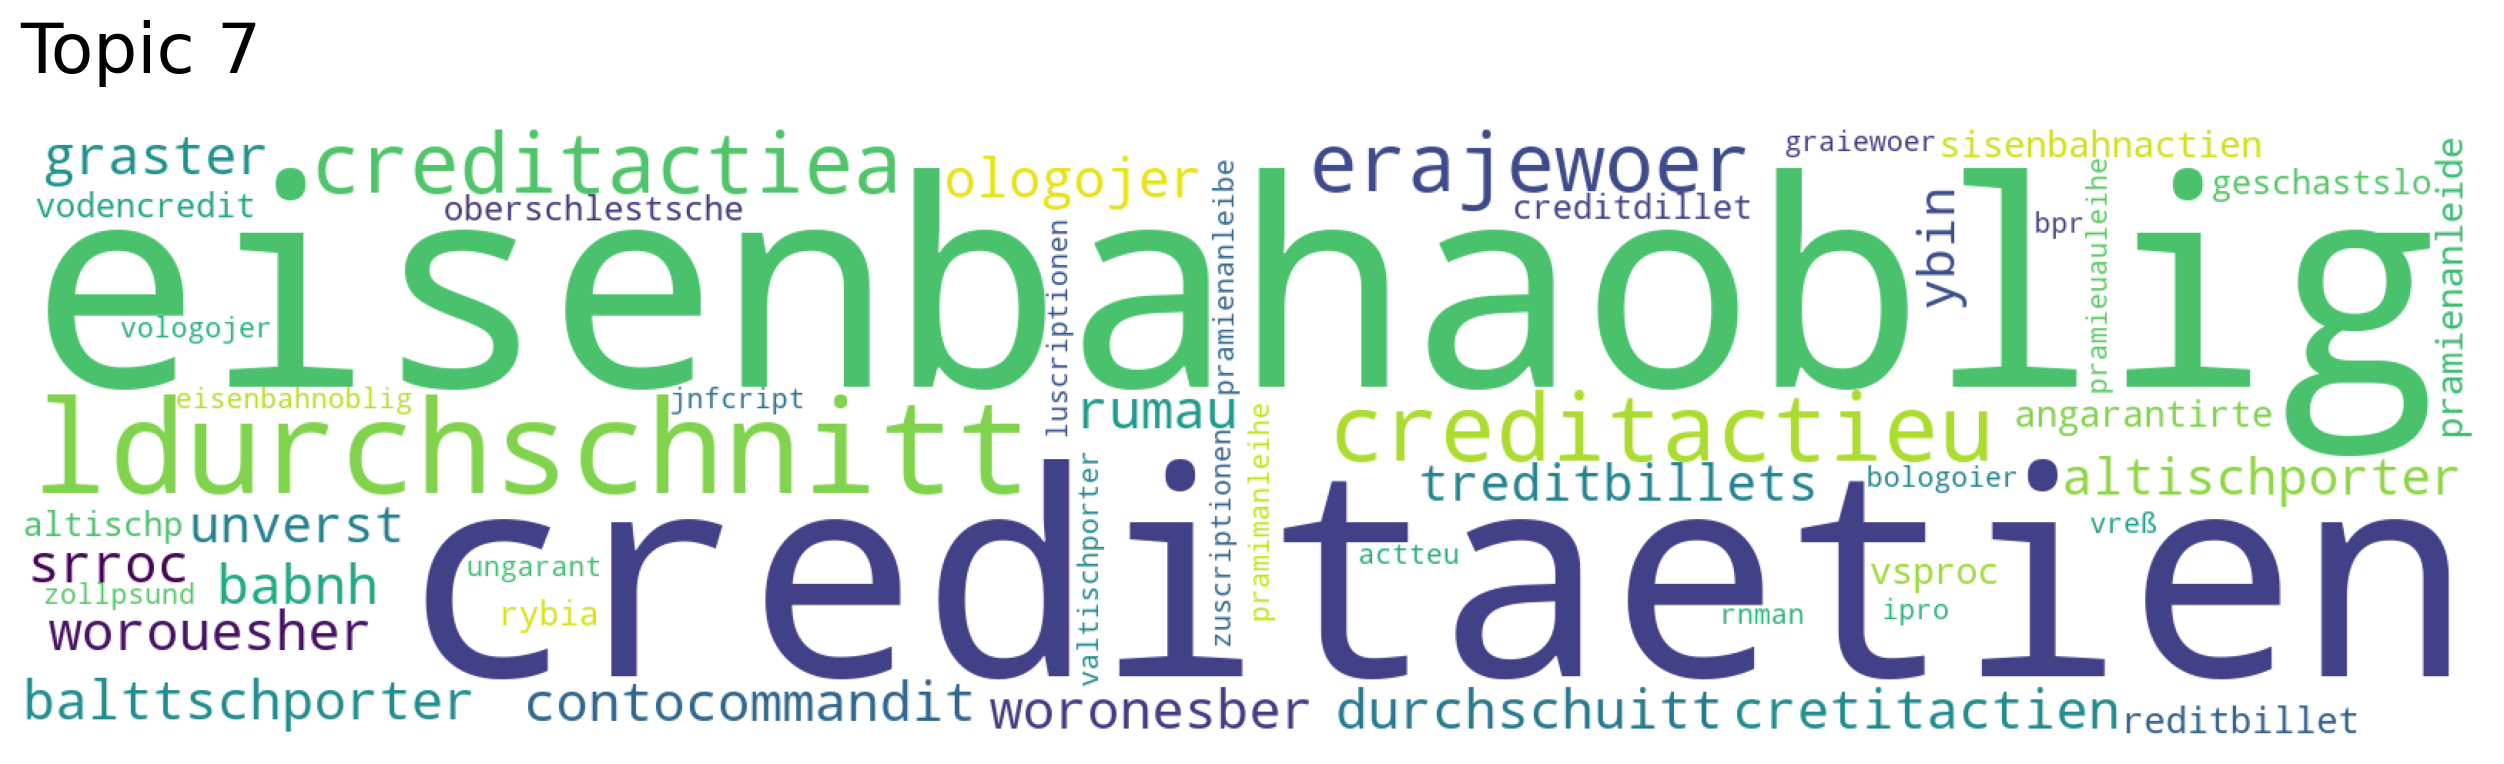

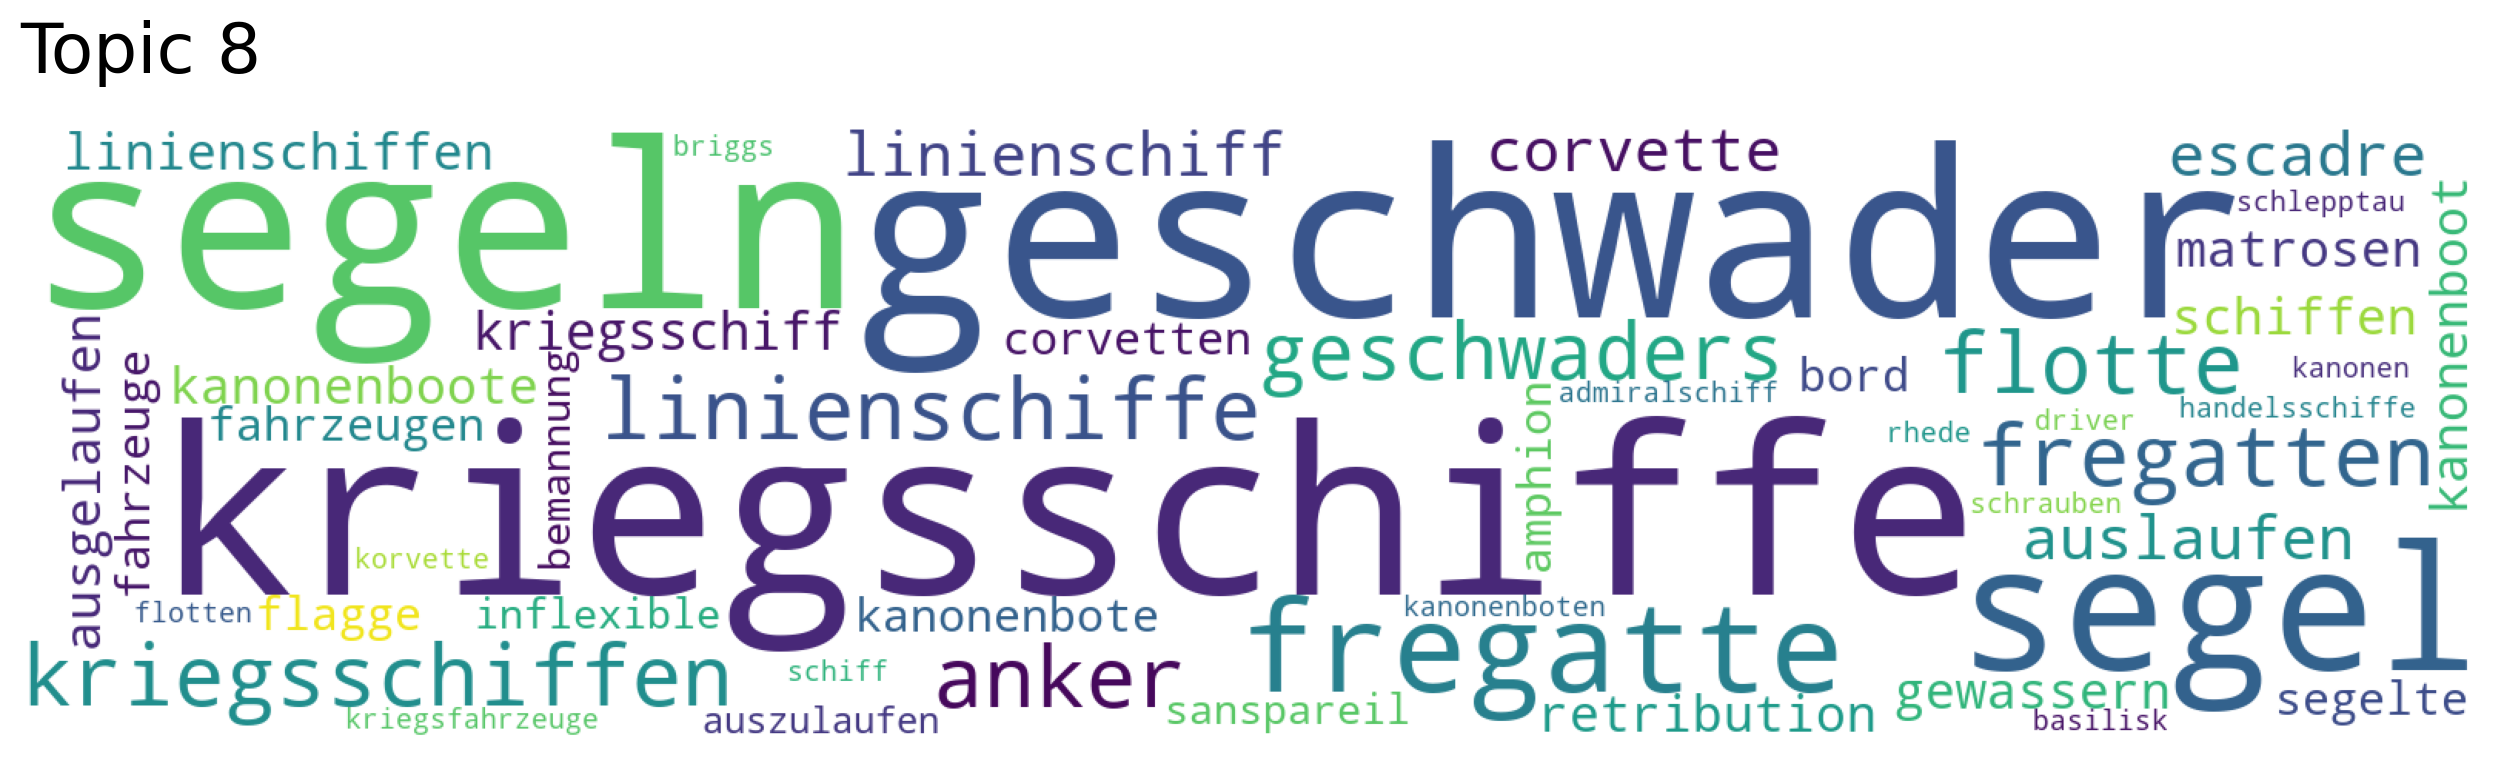

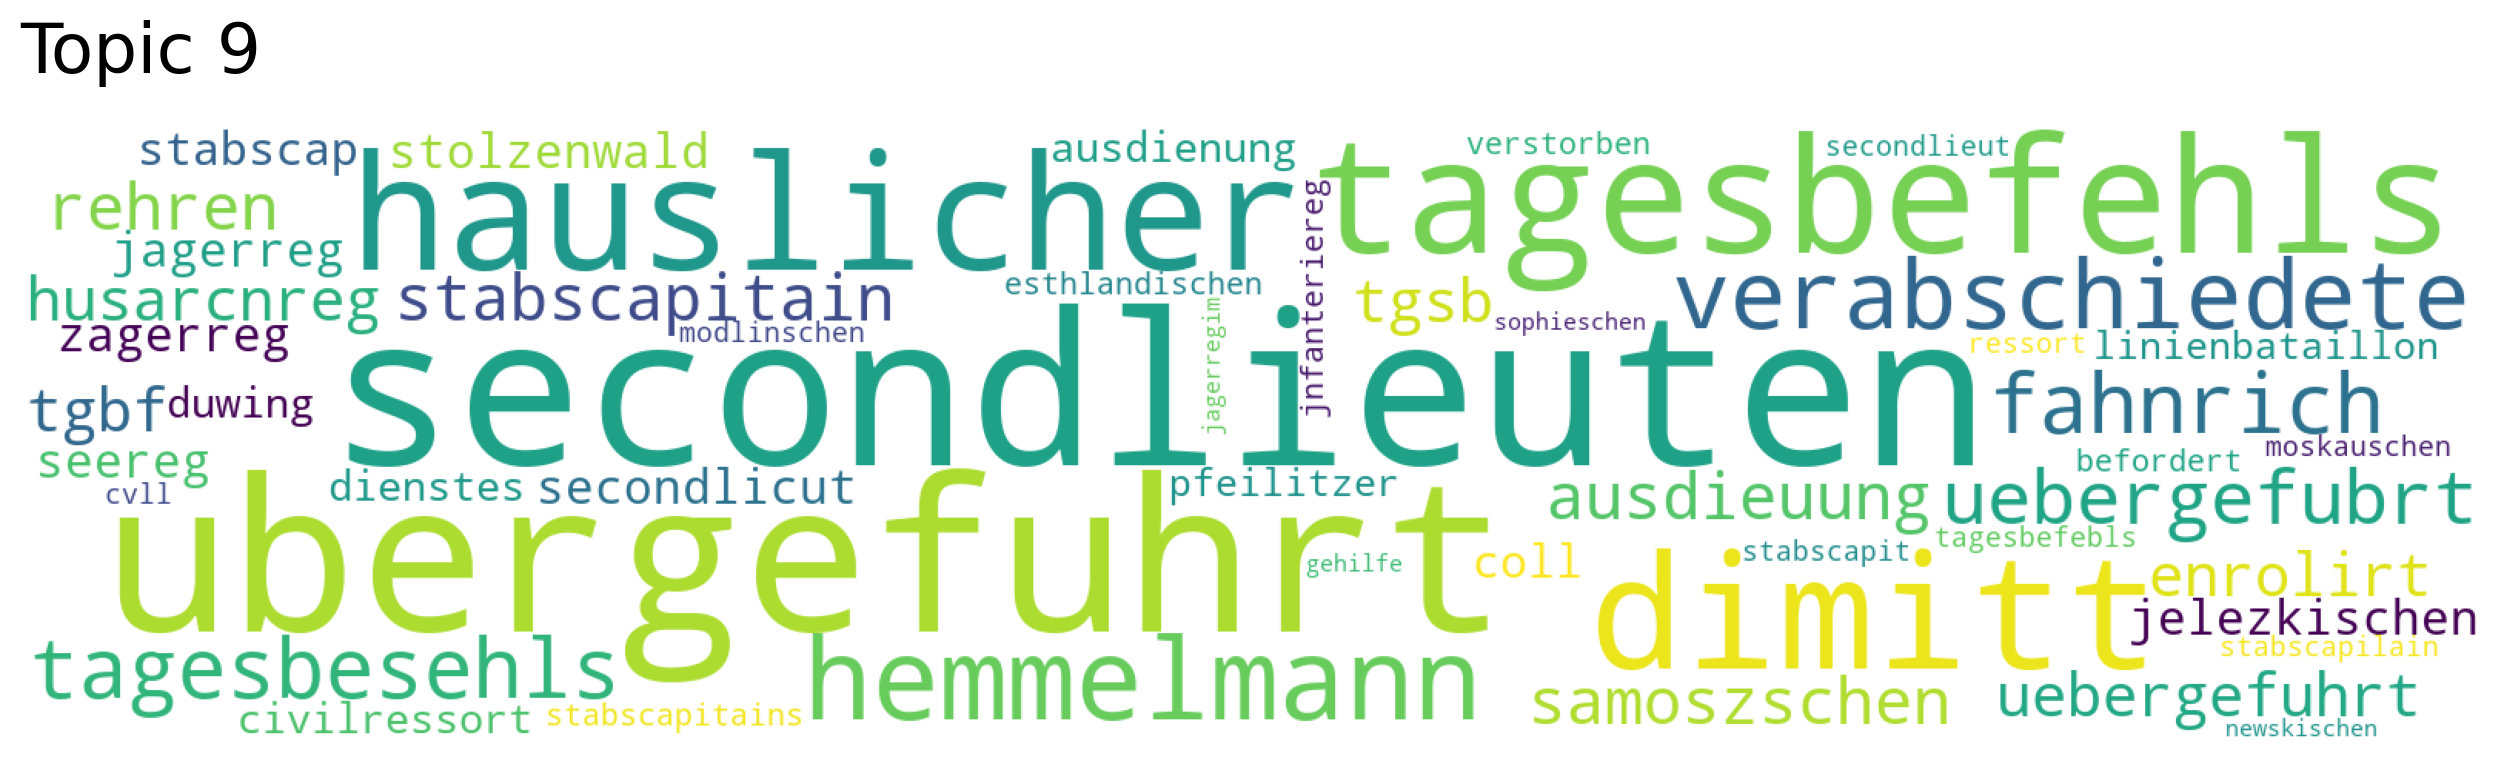

In [68]:
for top in range(10):
    t2v.generate_topic_wordcloud(top, background_color='white', reduced=True)

In [80]:
import umap
import seaborn as sns
import colorcet as cc

In [85]:
def plot_umap(model, reduction, exceptions=[], topic_names=None, savepath=None, **kwargs):
    
    print(f'Reducing topics to {reduction}')
    t2v.hierarchical_topic_reduction(reduction)
    
    print('Fetching IDs')
    relevant_ids = [doc_id for doc_id, top in
                    zip(t2v.document_ids, t2v.get_documents_topics(t2v.document_ids, reduced=True)[0])
                    if top not in exceptions]
    
    print('Fetching vectors')
    relevant_vectors = [vec for vec, top in
                        zip(t2v.document_vectors, t2v.get_documents_topics(t2v.document_ids, reduced=True)[0])
                        if top not in exceptions]
    
    print('Creating DataFrame')
    topic_vector_df = pd.DataFrame(index=relevant_ids, columns=range(1,301),
                                   data=relevant_vectors)
    
    print('Performing UMAP dimensional reduction')
    reducer = umap.UMAP()
    umapped = reducer.fit_transform(topic_vector_df)
    
    umap_df = pd.DataFrame(umapped, columns=['x', 'y'])
    main_topics = t2v.get_documents_topics(relevant_ids, reduced=True)[0]
    umap_df['topic'] = main_topics
    umap_df = umap_df.sort_values(by='topic')
    if topic_names:
        umap_df['topic'].replace(topic_names, inplace=True)
        
    return umap_df
    
    print('Plotting')
    plt.figure(figsize=(24, 24))
    
    sns.scatterplot(data=umap_df, x='x', y='y', hue='topic', **kwargs,
            palette=sns.color_palette(cc.glasbey_light, n_colors=len(umap_df.topic.unique())))
    
    plt.legend(ncol=2, markerscale=1, fontsize=14)
    plt.grid(False)
    plt.xlabel(None)
    plt.ylabel(None)
    plt.gca().yaxis.set_ticklabels([])
    plt.gca().xaxis.set_ticklabels([])
    
    if savepath:
        plt.savefig(savepath, bbox_inches='tight')
        
    plt.show()

In [86]:
umap_df = plot_umap(t2v, 30)

Reducing topics to 30
Fetching IDs
Fetching vectors
Creating DataFrame
Performing UMAP dimensional reduction


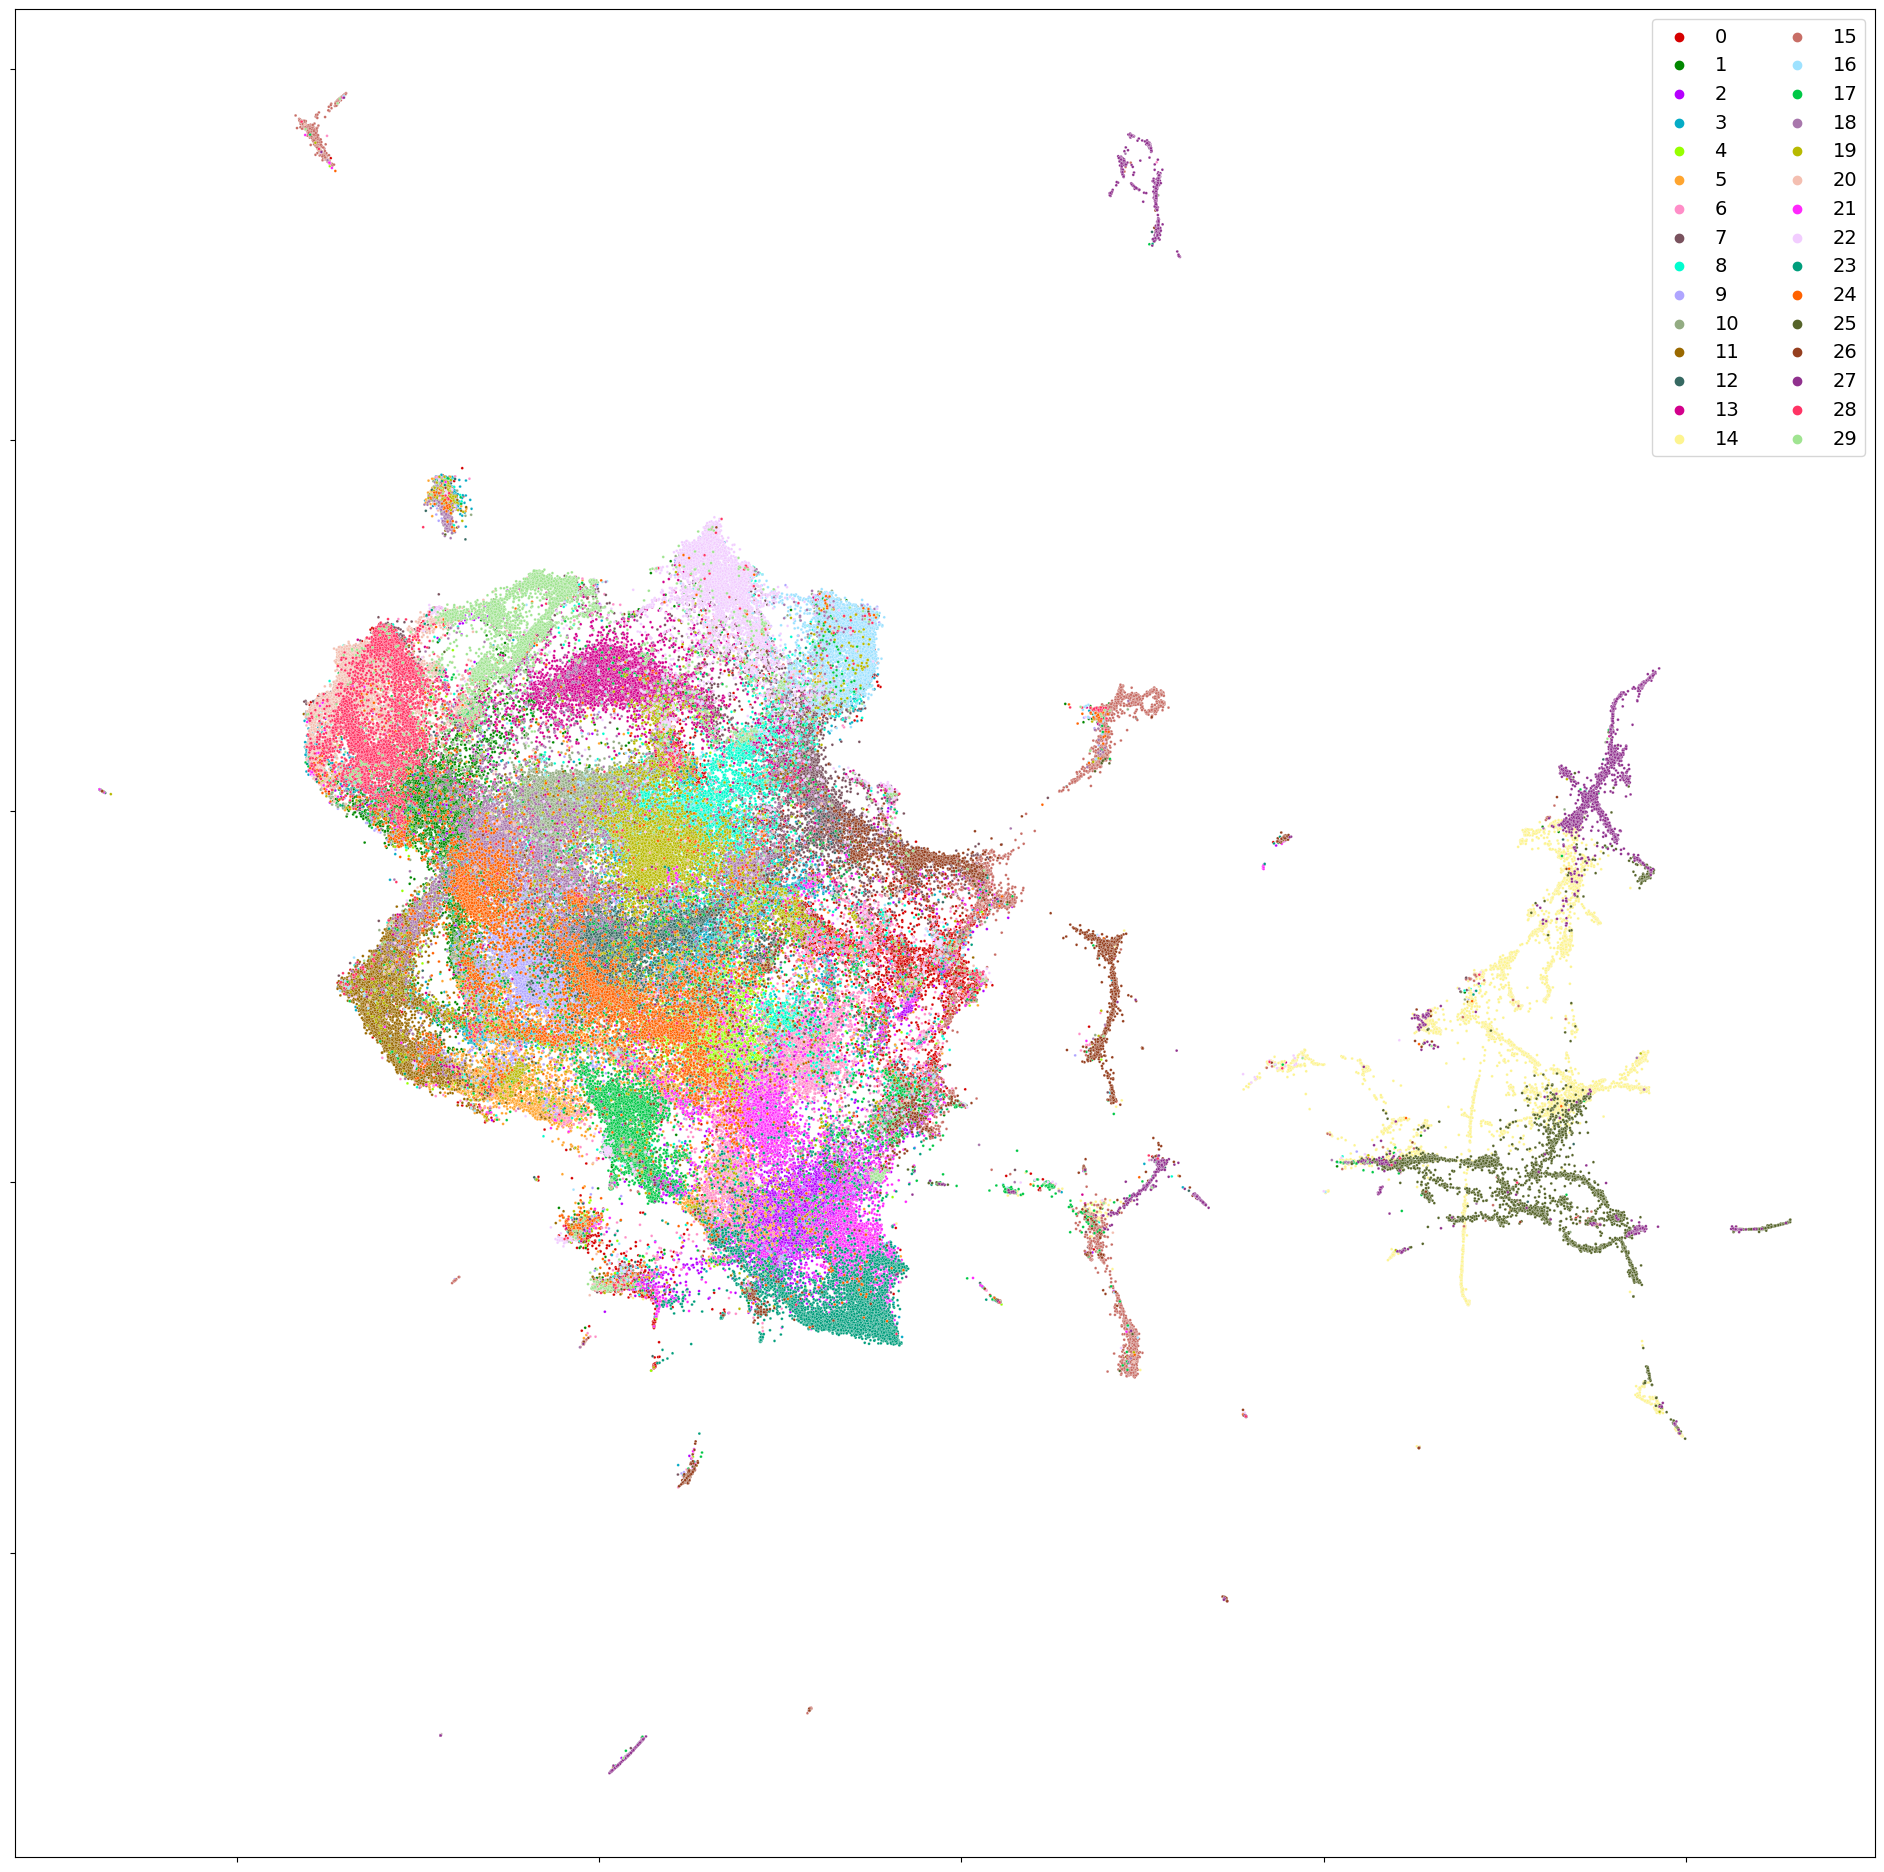

In [88]:
plt.figure(figsize=(24, 24))

sns.scatterplot(data=umap_df, x='x', y='y', hue='topic', s=4,
        palette=sns.color_palette(cc.glasbey_light, n_colors=len(umap_df.topic.unique())))

plt.legend(ncol=2, markerscale=1, fontsize=14)
plt.grid(False)
plt.xlabel(None)
plt.ylabel(None)
plt.gca().yaxis.set_ticklabels([])
plt.gca().xaxis.set_ticklabels([])

#if savepath:
#    plt.savefig(savepath, bbox_inches='tight')
    
plt.show()

In [98]:
def get_text_lengths(df):
    
    # only articles that contain > 2 placenames/dates
    df = df.loc[df.doc_id.isin(df.doc_id.value_counts()[lambda x: x > 1].index)]
    
    lengths = []
    
    # lengths = df.groupby('doc_id').apply(lambda x: x['start'] - x['end'].shift(1)).fillna(pd.NA).reset_index(drop=True).dropna()

    for ix in tqdm(df.doc_id.unique()):
        article = df.loc[df.doc_id == ix]
        for start, end in zip(article.start.iloc[1:], article.end.iloc[:-1]):
            lengths.append(start-stop)
            
    return lengths

In [99]:
lengths = get_text_lengths(df)

100%|███████████████████████████████████████████████████████████████████████████| 39948/39948 [01:06<00:00, 600.85it/s]


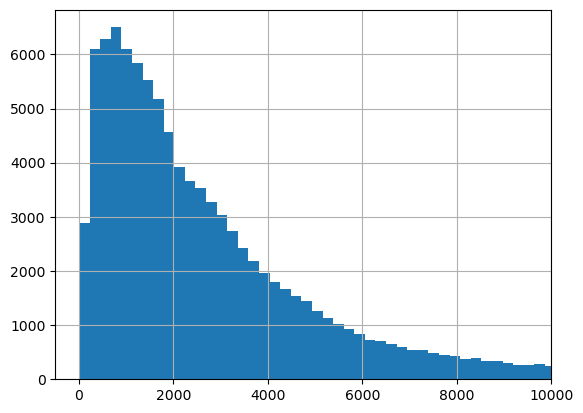

In [114]:
pd.Series(lengths).hist(bins=300)
plt.xlim(-500, 10000)
plt.show()

In [5]:
def get_sample():
    
    sample_doc_id = df.doc_id.sample().values[0]
    
    print(df.loc[df.doc_id == sample_doc_id, 'placename'].values, '\n\n')
    print(df.loc[df.doc_id == sample_doc_id, 'doc_date'].dt.year.values[0], '\n\n')
    print(rz.loc[sample_doc_id, 'heading'], '\n------------')
    print(rz.loc[sample_doc_id, 'full_text'])

In [32]:
get_sample()

['London' 'London'] 


1857 


Groszbritannien und Irland. 
------------
Groszbritannien und Irland.

	London, 1. Juli. (N. Pr. Z.) Die Sammlungen zu Ehren der freiwilligen Krankenpflegerin im Krimkriege, Miß Nlghtingale, find I mit einer Summe von 300.000 Thlrn. geschlossen worden. Es soll dafür ein Hospital unter ihrer Leitung gestiftet werden.
London, 2. Juli. (St.-A ) Ihre Majestät die Königin, der Prinz-Gemadl und die Königliche Familie begaben fich gestern früh zur Kunst.AuSstellung von WorSley nach Manchester und find heute Nach- ■ mittag von dort nach London zurückgekehrt. — Der Prinz Friedrich \ Wilhelm von Preußen nahm gestern in Begleitung des Prinzen ! Albert, des Prinzen von WaleS, des Prinzen Alfred, des Preußischen | Gesandten und mehrer Herren seines Gefolges folgende Beglück- , wünschungS.Adresse deS GemeinderalhS von Manchester in Empfang: i „An Se. K. H. den Prinzen Friedrich Wilhelm von Preußen. Ge- \ ruhen Ew. K. H. zu erlauben, daß wir — der Mayor, die Aldermen \ 